In [7]:
import pandas as pd

In [2]:
!pip install xlrd

You should consider upgrading via the 'C:\Users\erich\scoop\apps\pyenv\current\pyenv-win\versions\3.10.3\python.exe -m pip install --upgrade pip' command.


In [16]:
df = pd.read_csv("BEST_R-20220201.txt", sep="\t")
df.head()


C:\Users\erich\AppData\Local\Temp\ipykernel_19060\4230662989.py:1: DtypeWarning: Columns (12,13,14,18,31,32,33,34,35,39,40,41,42,43,44,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("BEST_R-20220201.txt", sep="\t")


,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,...,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
0,M1,1,Personenwagen,3155,ABARTH,ABARTH Zagato 750 GT Corsa,Zagato 750 GT Corsa,Zagato,750,GT Corsa,...,6403,Küssnacht am Rigi,1'331,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
1,M1,1,Personenwagen,3155,ABARTH,ABARTH 1300-104 S,1300-104 S,1300-104,S,NaN,...,3176,Neuenegg,670,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
2,NaN,1,Personenwagen,3155,ABARTH,ABARTH 1300-104 S,1300-104 S,1300-104,S,NaN,...,8152,Glattbrugg,66,CH,Schweiz,2,weiblich,60 bis 69,6.0,Veteranenfahrzeug
3,M1,1,Personenwagen,3155,ABARTH,Abarth Double Bubble Coupe,Double Bubble Coupe,Double,Bubble,Coupe,...,6210,Sursee,1'103,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
4,NaN,1,Personenwagen,3155,ABARTH,ABARTH Punto GT 1.4,Punto GT 1.4,Punto,GT,1.4,...,8545,Rickenbach ZH,225,CH,Schweiz,2,weiblich,50 bis 59,NaN,NaN


In [17]:
df.tail()

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,...,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
6795380,NaN,99,Anhänger,9975,ZIKUN,ZIKUN Riegel ZK-AZ1,Riegel ZK-AZ1,Riegel,ZK-AZ1,NaN,...,7512,Champfèr,3'787,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6795381,O2,99,Anhänger,442,ZIMMERMANN,Zimmermann HLK,HLK,HLK,NaN,NaN,...,5080,Laufenburg,4'170,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6795382,NaN,99,Anhänger,1796,ZSCHOKKE,ZSCHOKKE 12T,12T,12T,NaN,NaN,...,1205,Genève,6'621,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6795383,O2,99,Anhänger,8437,ZUCK,Zuck ZAK 1300,ZAK 1300,ZAK,1300,NaN,...,6203,Sempach Station,1'093,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6795384,NaN,99,Anhänger,97,ZWISSLER,ZWISSLER DE WIT,DE WIT,DE,WIT,NaN,...,9450,Altstätten SG,3'251,CH,Schweiz,3,juristisch,NaN,NaN,NaN


In [18]:
len(df.index)


6795385

Die Frage zielt wahrscheinlich auf Fahrzeuge mit einer nachträglichen Leistungssteigerung. Gehen Sie folgendermassen vor: Suchen Sie alle Fahrzeuge mit Typengehmigungszusatzcode M und vergleichen Sie deren Leistung mit der Leistung gemäss Typengenehmigung. Im Fahrzeugausweis ist in Feld 76 die Leistung des Einzelfahrzeugs angegeben. Eine amtlich bewilligte Leistungssteigerung führt dort zu einem Wert, der von dem der Typengenehmigung abweicht.

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
0,M1,1,Personenwagen,3155,ABARTH,ABARTH Zagato 750 GT Corsa,Zagato 750 GT Corsa,Zagato,750,GT Corsa,X,NaN,NaN,NaN,NaN,163,Limousine,Grau,NaN,2,2,0,535,205,740,0,0,0,0,747,0,34.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,M4,H,Hinterrad,2,1957,9,SZ,Italien,A,2018.0,8.0,0.0,Weiss,N,Normalschild,I,SZ,6403,Küssnacht am Rigi,1'331,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
1,M1,1,Personenwagen,3155,ABARTH,ABARTH 1300-104 S,1300-104 S,1300-104,S,NaN,000101,NaN,NaN,NaN,NaN,163,Limousine,Weiss,NaN,2,2,0,720,200,920,0,0,0,0,1280,4,49.6,NaN,B,Benzin,NaN,0.0,118.0,0.0,B00,M,Mechanisch,M,H,Hinterrad,2,1969,9,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3176,Neuenegg,670,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
2,NaN,1,Personenwagen,3155,ABARTH,ABARTH 1300-104 S,1300-104 S,1300-104,S,NaN,000101,NaN,NaN,NaN,NaN,163,Limousine,Rot,NaN,2,2,0,720,200,920,0,0,70,0,1280,0,49.6,NaN,B,Benzin,NaN,NaN,NaN,NaN,B00,NaN,NaN,NaN,H,Hinterrad,2,1970,8,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8152,Glattbrugg,66,CH,Schweiz,2,weiblich,60 bis 69,6.0,Veteranenfahrzeug
3,M1,1,Personenwagen,3155,ABARTH,Abarth Double Bubble Coupe,Double Bubble Coupe,Double,Bubble,Coupe,NaN,X,NaN,NaN,NaN,163,Limousine,Rot,NaN,2,2,0,540,210,750,0,0,50,0,747,4,31.6,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,M4,H,Hinterrad,2,1959,12,LU,Vereinigte Staaten von Amerika,A,2019.0,6.0,0.0,Weiss,N,Normalschild,I,LU,6210,Sursee,1'103,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
4,NaN,1,Personenwagen,3155,ABARTH,ABARTH Punto GT 1.4,Punto GT 1.4,Punto,GT,1.4,NaN,X,NaN,NaN,NaN,163,Limousine,Weiss,NaN,4,2,0,1260,405,1665,0,0,75,0,1368,0,114.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B04,M,Mechanisch,NaN,V,Vorderrad,2,2009,4,TG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8545,Rickenbach ZH,225,CH,Schweiz,2,weiblich,50 bis 59,NaN,NaN


In [20]:
#now i should look for all "Typengenehmigungs-Nr_Zusatz"  == M

In [21]:
df.shape

(6795385, 69)

In [22]:
df.dtypes

Fahrzeugklasse                object
Fahrzeugart_Code               int64
Fahrzeugart                   object
Marken_Code                    int64
Marke                         object
                              ...   
Halterart_Code                 int64
Halterart                     object
Altersklasse_Halter           object
Besondere_Verwendung_Code    float64
Besondere_Verwendung          object
Length: 69, dtype: object

In [23]:
df_pw=df[df['Fahrzeugart'] == 'Personenwagen']
df_pw

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
0,M1,1,Personenwagen,3155,ABARTH,ABARTH Zagato 750 GT Corsa,Zagato 750 GT Corsa,Zagato,750,GT Corsa,X,NaN,NaN,NaN,NaN,163,Limousine,Grau,NaN,2,2,0,535,205,740,0,0,0,0,747,0,34.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,M4,H,Hinterrad,2,1957,9,SZ,Italien,A,2018.0,8.0,0.0,Weiss,N,Normalschild,I,SZ,6403,Küssnacht am Rigi,1'331,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
1,M1,1,Personenwagen,3155,ABARTH,ABARTH 1300-104 S,1300-104 S,1300-104,S,NaN,000101,NaN,NaN,NaN,NaN,163,Limousine,Weiss,NaN,2,2,0,720,200,920,0,0,0,0,1280,4,49.6,NaN,B,Benzin,NaN,0.0,118.0,0.0,B00,M,Mechanisch,M,H,Hinterrad,2,1969,9,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3176,Neuenegg,670,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
2,NaN,1,Personenwagen,3155,ABARTH,ABARTH 1300-104 S,1300-104 S,1300-104,S,NaN,000101,NaN,NaN,NaN,NaN,163,Limousine,Rot,NaN,2,2,0,720,200,920,0,0,70,0,1280,0,49.6,NaN,B,Benzin,NaN,NaN,NaN,NaN,B00,NaN,NaN,NaN,H,Hinterrad,2,1970,8,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8152,Glattbrugg,66,CH,Schweiz,2,weiblich,60 bis 69,6.0,Veteranenfahrzeug
3,M1,1,Personenwagen,3155,ABARTH,Abarth Double Bubble Coupe,Double Bubble Coupe,Double,Bubble,Coupe,NaN,X,NaN,NaN,NaN,163,Limousine,Rot,NaN,2,2,0,540,210,750,0,0,50,0,747,4,31.6,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,M4,H,Hinterrad,2,1959,12,LU,Vereinigte Staaten von Amerika,A,2019.0,6.0,0.0,Weiss,N,Normalschild,I,LU,6210,Sursee,1'103,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
4,NaN,1,Personenwagen,3155,ABARTH,ABARTH Punto GT 1.4,Punto GT 1.4,Punto,GT,1.4,NaN,X,NaN,NaN,NaN,163,Limousine,Weiss,NaN,4,2,0,1260,405,1665,0,0,75,0,1368,0,114.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B04,M,Mechanisch,NaN,V,Vorderrad,2,2009,4,TG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8545,Rickenbach ZH,225,CH,Schweiz,2,weiblich,50 bis 59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726761,M1,1,Personenwagen,2747,ZBR,ZBR DIAVOLINO 125,DIAVOLINO 125,DIAVOLINO,125,NaN,092203,NaN,NaN,NaN,NaN,175,Offen,Rot,NaN,2,2,0,340,160,500,0,0,0,0,123,1,5.6,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,NaN,H,Hinterrad,2,1986,8,BE,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TG,9315,Winden,4'411,CH,Schweiz,3,juristisch,NaN,NaN,NaN
4726762,M1,1,Personenwagen,2747,ZBR,ZBR DIAVOLINO 250,DIAVOLINO 250,DIAVOLINO,250,NaN,092201,NaN,NaN,NaN,NaN,175,Offen,Gelb,NaN,2,2,0,340,210,550,0,0,0,0,245,2,9.3,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,NaN,H,Hinterrad,2,1987,7,VD,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,OW,6063,Stalden (Sarnen),1'407,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN
4726763,M1,1,Personenwagen,2747,ZBR,ZBR DIAVOLINO 125,DIAVOLINO 125,DIAVOLINO,125,NaN,092203,NaN,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Rot,NaN,2,2,0,340,160,500,0,0,0,0,123,1,5.6,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,NaN,H,Hinterrad

In [24]:
len(df_pw)

4726766

In [25]:
df['Typengenehmigungs-Nr_Zusatz'].value_counts()

X    310325
M    139414
C     59927
Y      2022
Name: Typengenehmigungs-Nr_Zusatz, dtype: int64

In [26]:
df[df['Typengenehmigungs-Nr_Zusatz'] == 'M'] # I below add also C, Y, X and Z
#that shows me all the cars with a M 

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
85,NaN,1,Personenwagen,2210,ACL,ACL Renault Rodeo 1 A,Renault Rodeo 1 A,Renault,Rodeo,1 A,001401,M,NaN,NaN,NaN,175,Offen,Weiss,NaN,4,2,0,640,410,1050,0,0,0,0,845,0,25.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,NaN,V,Vorderrad,2,1976,5,BE,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BL,4102,Binningen,2'765,CH,Schweiz,2,weiblich,30 bis 39,6.0,Veteranenfahrzeug
86,M1,1,Personenwagen,2210,ACL,ACL RENAULT RODEO 1A,RENAULT RODEO 1A,RENAULT,RODEO,1A,001404,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Gelb,NaN,4,2,0,670,435,1105,0,0,0,0,844,2,25.0,NaN,B,Benzin,NaN,0.0,102.0,0.0,000,M,Mechanisch,NaN,V,Vorderrad,2,1977,5,TI,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6517,ARBEDO,5'001,CH,Schweiz,2,weiblich,70 bis 79,6.0,Veteranenfahrzeug
91,M1,1,Personenwagen,2210,ACL,ACL RODEO 1 A,RODEO 1 A,RODEO,1,A,001401,M,NaN,NaN,NaN,175,Offen,Rot,NaN,4,2,0,640,410,1050,0,0,0,0,844,4,25.0,NaN,B,Benzin,NaN,0.0,101.0,0.0,B00,M,Mechanisch,NaN,V,Vorderrad,2,1974,5,LU,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6721,Ludiano,5'050,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
96,M1,1,Personenwagen,2210,ACL,ACL RENAULT 6 RODEO 2B,RENAULT 6 RODEO 2B,RENAULT,6,RODEO 2B,001402,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Gelb,NaN,4,2,0,740,480,1220,0,0,0,0,1108,4,34.56,NaN,B,Benzin,NaN,0.0,111.0,0.0,000,M,Mechanisch,NaN,V,Vorderrad,2,1975,11,TI,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6710,BIASCA,5'281,CH,Schweiz,2,weiblich,70 bis 79,NaN,NaN
134,M1,1,Personenwagen,6301,AERO,Aero 0662,0662,0662,NaN,NaN,NaN,M,NaN,NaN,NaN,163,Limousine,Grün,NaN,2,2,0,650,145,795,0,0,0,0,662,2,13.0,NaN,B,Benzin,NaN,NaN,NaN,NaN,B00,M,Mechanisch,M3,H,Hinterrad,2,1932,1,GR,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,AG,5707,Seengen,4'208,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791497,O2,99,Anhänger,9337,RUBAG,Rubag A500,A500,A500,NaN,NaN,9RB715,M,NaN,NaN,NaN,107,Baustellenanhänger,Rot,NaN,0,0,0,1500,200,1700,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2008,11,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8952,Schlieren,247,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6792242,O2,99,Anhänger,9337,RUBAG,RUBAG AZ?00/3.4,AZ?00/3.4,AZ?00/3.4,NaN,NaN,9RB725,M,NaN,NaN,NaN,107,Baustellenanhänger,Grün,NaN,0,0,0,2530,870,3400,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2019,7,BE,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3027,Bern,351,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6792728,O2,99,Anhänger,8603,TOURTRANS,TOURTRANS 813230,813230,813230,NaN,NaN,9T6002,M,NaN,NaN,NaN,221,Verkaufsfahrzeug,Rot,NaN,0,0,0,750,650,1400,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1994,12,SO,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3303,Jegenstorf,540,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN
6794137,O2,

In [27]:
#dfm = df[df['Typengenehmigungs-Nr_Zusatz'] == 'M']

#I want also to includ C, X and Y 

dfm = df[(df['Typengenehmigungs-Nr_Zusatz'] == 'M') |(df['Typengenehmigungs-Nr_Zusatz'] == 'C')|(df['Typengenehmigungs-Nr_Zusatz'] == 'Y')|(df['Typengenehmigungs-Nr_Zusatz'] == 'Z')]

####and = & when segmenting a dataframe. OR = |. 
         





#beofre i did that just for M, now i wana include also C, X and Y
#dfm=df[df['Typengenehmigungs-Nr_Zusatz'] == 'M']


# example from stack overflow: filtered_df = df.query( '"Country Name" == ["brazil","poland","russia","countrydummy","usa"]' )



In [28]:
len(dfm)

201363

In [29]:
dfm

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
85,NaN,1,Personenwagen,2210,ACL,ACL Renault Rodeo 1 A,Renault Rodeo 1 A,Renault,Rodeo,1 A,001401,M,NaN,NaN,NaN,175,Offen,Weiss,NaN,4,2,0,640,410,1050,0,0,0,0,845,0,25.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,NaN,V,Vorderrad,2,1976,5,BE,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BL,4102,Binningen,2'765,CH,Schweiz,2,weiblich,30 bis 39,6.0,Veteranenfahrzeug
86,M1,1,Personenwagen,2210,ACL,ACL RENAULT RODEO 1A,RENAULT RODEO 1A,RENAULT,RODEO,1A,001404,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Gelb,NaN,4,2,0,670,435,1105,0,0,0,0,844,2,25.0,NaN,B,Benzin,NaN,0.0,102.0,0.0,000,M,Mechanisch,NaN,V,Vorderrad,2,1977,5,TI,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6517,ARBEDO,5'001,CH,Schweiz,2,weiblich,70 bis 79,6.0,Veteranenfahrzeug
91,M1,1,Personenwagen,2210,ACL,ACL RODEO 1 A,RODEO 1 A,RODEO,1,A,001401,M,NaN,NaN,NaN,175,Offen,Rot,NaN,4,2,0,640,410,1050,0,0,0,0,844,4,25.0,NaN,B,Benzin,NaN,0.0,101.0,0.0,B00,M,Mechanisch,NaN,V,Vorderrad,2,1974,5,LU,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6721,Ludiano,5'050,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
96,M1,1,Personenwagen,2210,ACL,ACL RENAULT 6 RODEO 2B,RENAULT 6 RODEO 2B,RENAULT,6,RODEO 2B,001402,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Gelb,NaN,4,2,0,740,480,1220,0,0,0,0,1108,4,34.56,NaN,B,Benzin,NaN,0.0,111.0,0.0,000,M,Mechanisch,NaN,V,Vorderrad,2,1975,11,TI,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6710,BIASCA,5'281,CH,Schweiz,2,weiblich,70 bis 79,NaN,NaN
134,M1,1,Personenwagen,6301,AERO,Aero 0662,0662,0662,NaN,NaN,NaN,M,NaN,NaN,NaN,163,Limousine,Grün,NaN,2,2,0,650,145,795,0,0,0,0,662,2,13.0,NaN,B,Benzin,NaN,NaN,NaN,NaN,B00,M,Mechanisch,M3,H,Hinterrad,2,1932,1,GR,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,AG,5707,Seengen,4'208,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795374,NaN,99,Anhänger,1794,ZBINDEN,ZBINDEN TAM-98/2.7,TAM-98/2.7,TAM-98/2.7,NaN,NaN,9ZA113,C,NaN,NaN,NaN,699,Übrige gemäss Angaben des Verkehrsexperten,Weiss,NaN,0,0,0,2000,700,2700,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2002,6,M,NaN,NaN,NaN,NaN,6.0,"Schwarz, Armeefahrzeug",N,Normalschild,I,M,3003,Bern,351,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6795375,NaN,99,Anhänger,1794,ZBINDEN,ZBINDEN TAM-98/2.7,TAM-98/2.7,TAM-98/2.7,NaN,NaN,9ZA113,C,NaN,NaN,NaN,699,Übrige gemäss Angaben des Verkehrsexperten,Weiss,NaN,0,0,0,2000,700,2700,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2002,8,M,NaN,NaN,NaN,NaN,6.0,"Schwarz, Armeefahrzeug",N,Normalschild,I,M,3003,Bern,351,CH,Schweiz,3,juristisch,NaN,NaN,NaN
6795376,O3,99,Anhänger,1794,ZBINDEN,Zbinden TA-97/5.0,TA-97/5.0,TA-97/5.0,NaN,NaN,9ZA105,C,NaN,NaN,NaN,699,Übrige gemäss Angaben des Verkehrsexperten,Weiss,NaN,0,0,0,4500,500,5000,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,Na

In [30]:
dfm.isna().sum().head(15)

Fahrzeugklasse                  54654
Fahrzeugart_Code                    0
Fahrzeugart                         0
Marken_Code                         0
Marke                               0
Marke_und_Typ                       0
Typ1                              311
Typ2                              313
Typ3                            38936
Typ4                           122206
Typengenehmigungs-Nr              451
Typengenehmigungs-Nr_Zusatz         0
Typ                            201363
Variante                       201363
Version                        201363
dtype: int64

In [31]:
pd.set_option('display.max_columns', None)
dfm.head()
#lets me se all the cars with M for manipulatetd and also shows me the "leistung"
#somehow interisting will be the Ort or AND BFS-Gemeinde-Nr

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
85,NaN,1,Personenwagen,2210,ACL,ACL Renault Rodeo 1 A,Renault Rodeo 1 A,Renault,Rodeo,1 A,001401,M,NaN,NaN,NaN,175,Offen,Weiss,NaN,4,2,0,640,410,1050,0,0,0,0,845,0,25.0,NaN,B,Benzin,NaN,0.0,NaN,0.0,B00,M,Mechanisch,NaN,V,Vorderrad,2,1976,5,BE,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BL,4102,Binningen,2'765,CH,Schweiz,2,weiblich,30 bis 39,6.0,Veteranenfahrzeug
86,M1,1,Personenwagen,2210,ACL,ACL RENAULT RODEO 1A,RENAULT RODEO 1A,RENAULT,RODEO,1A,001404,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Gelb,NaN,4,2,0,670,435,1105,0,0,0,0,844,2,25.0,NaN,B,Benzin,NaN,0.0,102.0,0.0,000,M,Mechanisch,NaN,V,Vorderrad,2,1977,5,TI,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6517,ARBEDO,5'001,CH,Schweiz,2,weiblich,70 bis 79,6.0,Veteranenfahrzeug
91,M1,1,Personenwagen,2210,ACL,ACL RODEO 1 A,RODEO 1 A,RODEO,1,A,001401,M,NaN,NaN,NaN,175,Offen,Rot,NaN,4,2,0,640,410,1050,0,0,0,0,844,4,25.0,NaN,B,Benzin,NaN,0.0,101.0,0.0,B00,M,Mechanisch,NaN,V,Vorderrad,2,1974,5,LU,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6721,Ludiano,5'050,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
96,M1,1,Personenwagen,2210,ACL,ACL RENAULT 6 RODEO 2B,RENAULT 6 RODEO 2B,RENAULT,6,RODEO 2B,001402,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Gelb,NaN,4,2,0,740,480,1220,0,0,0,0,1108,4,34.56,NaN,B,Benzin,NaN,0.0,111.0,0.0,000,M,Mechanisch,NaN,V,Vorderrad,2,1975,11,TI,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,TI,6710,BIASCA,5'281,CH,Schweiz,2,weiblich,70 bis 79,NaN,NaN
134,M1,1,Personenwagen,6301,AERO,Aero 0662,0662,0662,NaN,NaN,NaN,M,NaN,NaN,NaN,163,Limousine,Grün,NaN,2,2,0,650,145,795,0,0,0,0,662,2,13.0,NaN,B,Benzin,NaN,NaN,NaN,NaN,B00,M,Mechanisch,M3,H,Hinterrad,2,1932,1,GR,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,AG,5707,Seengen,4'208,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug


In [32]:
len(dfm.index)

201363

In [33]:
#now i am gona read in the other file

Verknüpfen Sie die beiden Leistungen über die  Typengenehmigungsnummer, die in beiden Datensätzen vorkommt.

Bei Fragen können Sie mich gerne anrufen.

In [34]:
dfm[dfm['Typengenehmigungs-Nr'].isna()] #dfm are thoe ones with m, c, x and y

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung
134,M1,1,Personenwagen,6301,AERO,Aero 0662,0662,0662,NaN,NaN,NaN,M,NaN,NaN,NaN,163,Limousine,Grün,NaN,2,2,0,650,145,795,0,0,0,0,662,2,13.0,NaN,B,Benzin,NaN,NaN,NaN,NaN,B00,M,Mechanisch,M3,H,Hinterrad,2,1932,1,GR,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,AG,5707,Seengen,4'208,CH,Schweiz,1,männlich,60 bis 69,6.0,Veteranenfahrzeug
1475,NaN,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo -,-,-,NaN,NaN,NaN,M,NaN,NaN,NaN,163,Limousine,Grün,NaN,4,2,0,1045,355,1400,0,0,50,0,1962,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,B00,NaN,NaN,NaN,H,Hinterrad,2,1970,8,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8330,Pfäffikon ZH,177,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN
35504,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo Mito,Mito,Mito,NaN,NaN,NaN,Y,NaN,NaN,NaN,163,Limousine,Rot,NaN,5,2,0,1205,435,1640,0,0,50,0,1368,4,57.0,NaN,B,Benzin,NaN,NaN,130.0,NaN,B6b,M,Mechanisch,M5,V,Vorderrad,2,2018,6,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8706,Meilen,156,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN
54121,M1,1,Personenwagen,7909,AUDI,AUDI TT RS,TT RS,TT,RS,NaN,NaN,Y,NaN,NaN,NaN,163,Limousine,Grau,Metallic,2,2,0,1550,325,1875,0,0,0,0,2480,0,250,NaN,B,Benzin,NaN,0.0,197.0,0.0,B5b,A,Automat,NaN,A,Allrad,2,2011,12,GE,Frankreich,A,2015.0,1.0,0.0,Weiss,N,Normalschild,I,ZH,8700,Küsnacht ZH,154,CH,Schweiz,1,männlich,40 bis 49,NaN,NaN
58334,M1,1,Personenwagen,4009,AUDI,Audi TT Coupé,TT Coupé,TT,Coupé,NaN,NaN,M,NaN,NaN,NaN,163,Limousine,Grau,Metallic,4,2,0,1354,276,1630,0,0,75,0,1984,4,169,NaN,B,Benzin,NaN,NaN,NaN,NaN,B6b,M,Mechanisch,M6,V,Vorderrad,2,2015,3,ZH,Deutschland,A,2015.0,9.0,0.0,Weiss,N,Normalschild,I,ZH,8184,Bachenbülach,51,CH,Schweiz,2,weiblich,50 bis 59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788537,O2,99,Anhänger,976,BAETSCHMANN,Bätschmann APC 390,APC 390,APC,390,NaN,NaN,Y,NaN,NaN,NaN,221,Verkaufsfahrzeug,Bunt,NaN,0,0,0,2130,570,2700,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,2016,9,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8153,Rümlang,97,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN
6788674,O2,99,Anhänger,9912,BRENDERUP,Brenderup 1005 CH,1005 CH,1005,CH,NaN,NaN,Y,NaN,NaN,NaN,699,Übrige gemäss Angaben des Verkehrsexperten,Rot,NaN,0,0,0,600,150,750,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1996,10,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8614,Bertschikon (Gossau ZH),115,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN
6789299,NaN,99,Anhänger,23,ELWA,Elwa,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,221,Verkaufsfahrzeug,Grau,NaN,0,0,0,880,320,1200,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1989,7,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8344,Bäretswil,111,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN
6790021,O2,99,Anhänger,8513,HUMBAUR,Humbaur HA75/100,HA75/100,HA75/100,NaN,NaN,NaN,Y,NaN,NaN,NaN,106,Ausstell

In [35]:
len(dfm[dfm['Typengenehmigungs-Nr'].isna()]) #51 have no Typengenehmigungs-Nr.

451

In [37]:
df_auto =  pd.read_csv("TG-Automobil.txt", sep="\t", encoding='latin-1', error_bad_lines=False)

df_auto

C:\Users\erich\AppData\Local\Temp\ipykernel_19060\3092310958.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_auto =  pd.read_csv("TG-Automobil.txt", sep="\t", encoding='latin-1', error_bad_lines=False)
b'Skipping line 3697: expected 224 fields, saw 225\n'
C:\Users\erich\AppData\Local\Temp\ipykernel_19060\3092310958.py:1: DtypeWarning: Columns (8,32,33,34,35,36,37,44,52,57,73,78,79,80,110,111,114,115,200,214,215,216,217,218,219,220,221) have mixed types. Specify dtype option on import or set low_memory=False.
  df_auto =  pd.read_csv("TG-Automobil.txt", sep="\t", encoding='latin-1', error_bad_lines=False)


,Typengenehmigungsnummer,Typengenehmigung erteilt,gültig für Importdatum bis,Erweiterung TG vom:,Erweiterung TG Positionen,01 EFKO-Code,01 Fahrzeugart,02 Fahrzeugsubart Code,02 Fahrzeugsubart,03 Fahrzeugklasse,04 Marke,04 Typ,05 Typ; Variante/Version,06 Vorziffer,07 Karosserieform Code,07 Karosserieform,08 Geländefahrzeug,09 EU-Gesamtgenehmigung,10 EFKO-Code,10 Hersteller,11 Herstellerplakette,12 Fahrgestellnummer,14 Achsen/Räder,15 Federung,16 Lenkung,17 Achsantrieb,18 Getriebe 1,18 iA 1,18 Zuordnung 1,18 Getriebe 2,18 iA 2,18 Zuordnung 2,18 Getriebe 3,18 iA 3,18 Zuordnung 3,18 Getriebe 4,18 iA 4,18 Zuordnung 4,19 Fahrzeug Vmax mech von,19 Fahrzeug Vmax mech bis,19 Fahrzeug Vmax autom von,19 Fahrzeug Vmax autom bis,20 Betriebsbremse Z1,20 Betriebsbremse Z2,20 Betriebsbremse Z3,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,21 Hilfsbremse Z1,21 Hilfsbremse Z2,22 Feststellbremse,Unnamed: 54,Unnamed: 55,Unnamed: 56,23 Dauerbremse,Unnamed: 58,25 Motor Marke,25 Motor Typ,26 Bauart,26 Bauart Treibstoff,27 Hubraum,28 Leistung kW,28 Leistung n,29 Md. max Nm,29 Md. max n,30 Abgasreinigung,31 Schalldämpfer 1 Art,31 Schalldämpfer 1 Bez,32 Schalldämpfer 2 Art,32 Schalldämpfer 2 Bez,33 Schalldämpfer 3 Art,33 Schalldämpfer 3 Bez,34 Motorkennzeichen,34 Motorkennzeichen Anbringungsort,35 Geräuschdämpfung Z1,35 Geräuschdämpfung Z2,35 Geräuschdämpfung Z3,35 Geräuschdämpfung Z4,37 Anzahl Plätze Total von,37 Anzahl Plätze Total bis,37 Anzahl Plätze vorne von,37 Anzahl Plätze vorne bis,38 Anzahl Türen,Unnamed: 86,39 Rückspiegel,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,40 Länge von,40 Länge bis,41 Breite von,41 Breite bis,42 Höhe von,42 Höhe bis,43 Überhang vorne von,43 Überhang vorne bis,43 Überhang hinten von,43 Überhang hinten bis,44 Abstand Achse 1-2 von,44 Abstand Achse 1-2 bis,45 Abstand Achse 2-3 von,45 Abstand Achse 2-3 bis,46 Abstand Achse 3-4 von,46 Abstand Achse 3-4 bis,47 Spur Achse 1 von,47 Spur Achse 1 bis,47 ET Achse 1 von,47 ET Achse 1 bis,48 Spur Achse 2 von,48 Spur Achse 2 bis,48 ET Achse 2 von,48 ET Achse 2 bis,49 Spur Achse 3 von,49 Spur Achse 3 bis,49 ET Achse 3 von,49 ET Achse 3 bis,50 Spur Achse 4 von,50 Spur Achse 4 bis,50 ET Achse 4 von,50 ET Achse 4 bis,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,52 Leergewicht von,52 Leergewicht bis,53 Garantiegewicht von,53 Garantiegewicht bis,54 Achsgarantie v von,54 Achsgarantie v bis,54 Achsgarantie h von,54 Achsgarantie h bis,Unnamed: 152,Unnamed: 153,55 keine Dachlast,55 Dachlast,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,56 keine Anhängelast,57 gebremst mech,57 gebremst autom,58 ungebremst mech,58 ungebremst autom,59 mit Auflaufbremse mech,59 mit Auflaufbremse autom,60 Zentralachsanhänger mech,60 Zentralachsanhänger autom,61 Zentralachsanh. /ABS mech,61 Zentralachsanh. /ABS autom,62 Drehschemellenkung mech,62 Drehschemellenkung autom,63 Drehschemellenk./ABS mech,63 Drehschemellenk./ABS autom,64 Sattelanhänger mech,64 Sattelanhänger autom,65 Sattelanhänger/ABS mech,65 Sattelanhänger/ABS autom,66 Gesamtzuggewicht mech,66 Gesamtzuggewicht autom,67 Stützlast/Faktor Anh.Vorr. mech,67 Stützlast/Faktor Anh.Vorr. autom,67 Stützlast mech,67 Stützlast autom,Unnamed: 189,69 Reifen Felgen,70 Reifen Felgen,71 Reifen Felgen,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Bemerkungen Z1,Bemerkungen Z2,Bemerkungen Z3,Bemerkungen Z4,Bemerkungen Z5,Bemerkungen Z6,Bemerkungen Z7,Bemerkungen Z8,Bemerkungen Z9,Bemerkungen Z10,Bemerkungen Z11,Bemerkungen Z12,Bemerkungen Z13,Bemerkungen Z14,Bemerkungen Z15,Bemerkungen Z16,Bemerkungen Z17,Bemerkungen Z18,Bemerkungen Z19,Bemerkungen Z20,Bemerkungen Z21,Bemerkungen Z22,Bemerkungen Z23,Bemerkungen Z24,Unnamed: 223
0,ABA101,2

In [38]:
# df_auto =  pd.read_csv("TG-Automobil.txt", sep="\t", encoding='latin-1', error_bad_lines=False, usecols=)


In [39]:
len(df_auto.index)


187238

In [40]:
df_auto['Typengenehmigungsnummer'].value_counts()

ABA101    1
3DA335    1
3DA337    1
3DA338    1
3DA339    1
         ..
1MV523    1
1MV524    1
1MV525    1
1MV526    1
8ZA103    1
Name: Typengenehmigungsnummer, Length: 187238, dtype: int64

In [41]:
dfm['Typengenehmigungs-Nr'].value_counts()

908605    644
3MH938    640
3P6039    541
671112    497
6BA316    456
         ... 
1RC499      1
4FA229      1
1RD286      1
1RC388      1
9Z0504      1
Name: Typengenehmigungs-Nr, Length: 40139, dtype: int64

In [42]:
set(dfm['Typengenehmigungs-Nr'])&set(df_auto['Typengenehmigungsnummer']) #here I check if they have simularities

{'1BB842',
 '1VH520',
 '3RC664',
 '3MP195',
 '1PA644',
 '1FL226',
 '1XV992',
 '3FD159',
 '3VB528',
 '1VA724',
 '1MD598',
 '3MJ815',
 '5BA814',
 '3MG306',
 '4DA484',
 '3OB417',
 '1XB382',
 '3TA304',
 '1TA932',
 '3FA274',
 '3LA116',
 '3FD643',
 '1AB967',
 '1SB878',
 '4HA176',
 '1OB318',
 '1BB902',
 '1MC745',
 '5NA105',
 '1OB991',
 '1BG885',
 '6LA614',
 '3PB433',
 '1RC297',
 '4CA481',
 '3CC347',
 '5KA556',
 '1MC984',
 '1FA705',
 '1FM356',
 '1VB362',
 '1XH228',
 '2RA203',
 '3RA318',
 '1AA183',
 '1FK469',
 '3OB107',
 '3NB633',
 '1DB136',
 '3FE711',
 '1XM711',
 '3RB487',
 '4DA294',
 '3RA439',
 '4SB223',
 '1OA513',
 '1XK267',
 '1AH566',
 '3VJ481',
 '5LA204',
 '1VD823',
 '1RD244',
 '5VA730',
 '1VA549',
 '1FB325',
 '1FR358',
 '3FE788',
 '3FB629',
 '3LA222',
 '1VD955',
 '3PG522',
 '3VE384',
 '3XA487',
 '4NA203',
 '5WA749',
 '3SB736',
 '3MF355',
 '1VA366',
 '3IA306',
 '3SA542',
 '1CA644',
 '4VA481',
 '1XF164',
 '1LD317',
 '3NB604',
 '1MD319',
 '1VD859',
 '1AC557',
 '1TA259',
 '1XB528',
 '5KA107',

In [43]:
len(set(dfm['Typengenehmigungs-Nr'])&set(df_auto['Typengenehmigungsnummer']))

25915

In [44]:
df_auto[df_auto['Typengenehmigungsnummer'].isin(df_auto['Typengenehmigungsnummer'])]

,Typengenehmigungsnummer,Typengenehmigung erteilt,gültig für Importdatum bis,Erweiterung TG vom:,Erweiterung TG Positionen,01 EFKO-Code,01 Fahrzeugart,02 Fahrzeugsubart Code,02 Fahrzeugsubart,03 Fahrzeugklasse,04 Marke,04 Typ,05 Typ; Variante/Version,06 Vorziffer,07 Karosserieform Code,07 Karosserieform,08 Geländefahrzeug,09 EU-Gesamtgenehmigung,10 EFKO-Code,10 Hersteller,11 Herstellerplakette,12 Fahrgestellnummer,14 Achsen/Räder,15 Federung,16 Lenkung,17 Achsantrieb,18 Getriebe 1,18 iA 1,18 Zuordnung 1,18 Getriebe 2,18 iA 2,18 Zuordnung 2,18 Getriebe 3,18 iA 3,18 Zuordnung 3,18 Getriebe 4,18 iA 4,18 Zuordnung 4,19 Fahrzeug Vmax mech von,19 Fahrzeug Vmax mech bis,19 Fahrzeug Vmax autom von,19 Fahrzeug Vmax autom bis,20 Betriebsbremse Z1,20 Betriebsbremse Z2,20 Betriebsbremse Z3,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,21 Hilfsbremse Z1,21 Hilfsbremse Z2,22 Feststellbremse,Unnamed: 54,Unnamed: 55,Unnamed: 56,23 Dauerbremse,Unnamed: 58,25 Motor Marke,25 Motor Typ,26 Bauart,26 Bauart Treibstoff,27 Hubraum,28 Leistung kW,28 Leistung n,29 Md. max Nm,29 Md. max n,30 Abgasreinigung,31 Schalldämpfer 1 Art,31 Schalldämpfer 1 Bez,32 Schalldämpfer 2 Art,32 Schalldämpfer 2 Bez,33 Schalldämpfer 3 Art,33 Schalldämpfer 3 Bez,34 Motorkennzeichen,34 Motorkennzeichen Anbringungsort,35 Geräuschdämpfung Z1,35 Geräuschdämpfung Z2,35 Geräuschdämpfung Z3,35 Geräuschdämpfung Z4,37 Anzahl Plätze Total von,37 Anzahl Plätze Total bis,37 Anzahl Plätze vorne von,37 Anzahl Plätze vorne bis,38 Anzahl Türen,Unnamed: 86,39 Rückspiegel,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,40 Länge von,40 Länge bis,41 Breite von,41 Breite bis,42 Höhe von,42 Höhe bis,43 Überhang vorne von,43 Überhang vorne bis,43 Überhang hinten von,43 Überhang hinten bis,44 Abstand Achse 1-2 von,44 Abstand Achse 1-2 bis,45 Abstand Achse 2-3 von,45 Abstand Achse 2-3 bis,46 Abstand Achse 3-4 von,46 Abstand Achse 3-4 bis,47 Spur Achse 1 von,47 Spur Achse 1 bis,47 ET Achse 1 von,47 ET Achse 1 bis,48 Spur Achse 2 von,48 Spur Achse 2 bis,48 ET Achse 2 von,48 ET Achse 2 bis,49 Spur Achse 3 von,49 Spur Achse 3 bis,49 ET Achse 3 von,49 ET Achse 3 bis,50 Spur Achse 4 von,50 Spur Achse 4 bis,50 ET Achse 4 von,50 ET Achse 4 bis,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,52 Leergewicht von,52 Leergewicht bis,53 Garantiegewicht von,53 Garantiegewicht bis,54 Achsgarantie v von,54 Achsgarantie v bis,54 Achsgarantie h von,54 Achsgarantie h bis,Unnamed: 152,Unnamed: 153,55 keine Dachlast,55 Dachlast,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,56 keine Anhängelast,57 gebremst mech,57 gebremst autom,58 ungebremst mech,58 ungebremst autom,59 mit Auflaufbremse mech,59 mit Auflaufbremse autom,60 Zentralachsanhänger mech,60 Zentralachsanhänger autom,61 Zentralachsanh. /ABS mech,61 Zentralachsanh. /ABS autom,62 Drehschemellenkung mech,62 Drehschemellenkung autom,63 Drehschemellenk./ABS mech,63 Drehschemellenk./ABS autom,64 Sattelanhänger mech,64 Sattelanhänger autom,65 Sattelanhänger/ABS mech,65 Sattelanhänger/ABS autom,66 Gesamtzuggewicht mech,66 Gesamtzuggewicht autom,67 Stützlast/Faktor Anh.Vorr. mech,67 Stützlast/Faktor Anh.Vorr. autom,67 Stützlast mech,67 Stützlast autom,Unnamed: 189,69 Reifen Felgen,70 Reifen Felgen,71 Reifen Felgen,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Bemerkungen Z1,Bemerkungen Z2,Bemerkungen Z3,Bemerkungen Z4,Bemerkungen Z5,Bemerkungen Z6,Bemerkungen Z7,Bemerkungen Z8,Bemerkungen Z9,Bemerkungen Z10,Bemerkungen Z11,Bemerkungen Z12,Bemerkungen Z13,Bemerkungen Z14,Bemerkungen Z15,Bemerkungen Z16,Bemerkungen Z17,Bemerkungen Z18,Bemerkungen Z19,Bemerkungen Z20,Bemerkungen Z21,Bemerkungen Z22,Bemerkungen Z23,Bemerkungen Z24,Unnamed: 223
0,ABA101,2

In [45]:
df_auto.tail()

,Typengenehmigungsnummer,Typengenehmigung erteilt,gültig für Importdatum bis,Erweiterung TG vom:,Erweiterung TG Positionen,01 EFKO-Code,01 Fahrzeugart,02 Fahrzeugsubart Code,02 Fahrzeugsubart,03 Fahrzeugklasse,04 Marke,04 Typ,05 Typ; Variante/Version,06 Vorziffer,07 Karosserieform Code,07 Karosserieform,08 Geländefahrzeug,09 EU-Gesamtgenehmigung,10 EFKO-Code,10 Hersteller,11 Herstellerplakette,12 Fahrgestellnummer,14 Achsen/Räder,15 Federung,16 Lenkung,17 Achsantrieb,18 Getriebe 1,18 iA 1,18 Zuordnung 1,18 Getriebe 2,18 iA 2,18 Zuordnung 2,18 Getriebe 3,18 iA 3,18 Zuordnung 3,18 Getriebe 4,18 iA 4,18 Zuordnung 4,19 Fahrzeug Vmax mech von,19 Fahrzeug Vmax mech bis,19 Fahrzeug Vmax autom von,19 Fahrzeug Vmax autom bis,20 Betriebsbremse Z1,20 Betriebsbremse Z2,20 Betriebsbremse Z3,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,21 Hilfsbremse Z1,21 Hilfsbremse Z2,22 Feststellbremse,Unnamed: 54,Unnamed: 55,Unnamed: 56,23 Dauerbremse,Unnamed: 58,25 Motor Marke,25 Motor Typ,26 Bauart,26 Bauart Treibstoff,27 Hubraum,28 Leistung kW,28 Leistung n,29 Md. max Nm,29 Md. max n,30 Abgasreinigung,31 Schalldämpfer 1 Art,31 Schalldämpfer 1 Bez,32 Schalldämpfer 2 Art,32 Schalldämpfer 2 Bez,33 Schalldämpfer 3 Art,33 Schalldämpfer 3 Bez,34 Motorkennzeichen,34 Motorkennzeichen Anbringungsort,35 Geräuschdämpfung Z1,35 Geräuschdämpfung Z2,35 Geräuschdämpfung Z3,35 Geräuschdämpfung Z4,37 Anzahl Plätze Total von,37 Anzahl Plätze Total bis,37 Anzahl Plätze vorne von,37 Anzahl Plätze vorne bis,38 Anzahl Türen,Unnamed: 86,39 Rückspiegel,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,40 Länge von,40 Länge bis,41 Breite von,41 Breite bis,42 Höhe von,42 Höhe bis,43 Überhang vorne von,43 Überhang vorne bis,43 Überhang hinten von,43 Überhang hinten bis,44 Abstand Achse 1-2 von,44 Abstand Achse 1-2 bis,45 Abstand Achse 2-3 von,45 Abstand Achse 2-3 bis,46 Abstand Achse 3-4 von,46 Abstand Achse 3-4 bis,47 Spur Achse 1 von,47 Spur Achse 1 bis,47 ET Achse 1 von,47 ET Achse 1 bis,48 Spur Achse 2 von,48 Spur Achse 2 bis,48 ET Achse 2 von,48 ET Achse 2 bis,49 Spur Achse 3 von,49 Spur Achse 3 bis,49 ET Achse 3 von,49 ET Achse 3 bis,50 Spur Achse 4 von,50 Spur Achse 4 bis,50 ET Achse 4 von,50 ET Achse 4 bis,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,52 Leergewicht von,52 Leergewicht bis,53 Garantiegewicht von,53 Garantiegewicht bis,54 Achsgarantie v von,54 Achsgarantie v bis,54 Achsgarantie h von,54 Achsgarantie h bis,Unnamed: 152,Unnamed: 153,55 keine Dachlast,55 Dachlast,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,56 keine Anhängelast,57 gebremst mech,57 gebremst autom,58 ungebremst mech,58 ungebremst autom,59 mit Auflaufbremse mech,59 mit Auflaufbremse autom,60 Zentralachsanhänger mech,60 Zentralachsanhänger autom,61 Zentralachsanh. /ABS mech,61 Zentralachsanh. /ABS autom,62 Drehschemellenkung mech,62 Drehschemellenkung autom,63 Drehschemellenk./ABS mech,63 Drehschemellenk./ABS autom,64 Sattelanhänger mech,64 Sattelanhänger autom,65 Sattelanhänger/ABS mech,65 Sattelanhänger/ABS autom,66 Gesamtzuggewicht mech,66 Gesamtzuggewicht autom,67 Stützlast/Faktor Anh.Vorr. mech,67 Stützlast/Faktor Anh.Vorr. autom,67 Stützlast mech,67 Stützlast autom,Unnamed: 189,69 Reifen Felgen,70 Reifen Felgen,71 Reifen Felgen,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Bemerkungen Z1,Bemerkungen Z2,Bemerkungen Z3,Bemerkungen Z4,Bemerkungen Z5,Bemerkungen Z6,Bemerkungen Z7,Bemerkungen Z8,Bemerkungen Z9,Bemerkungen Z10,Bemerkungen Z11,Bemerkungen Z12,Bemerkungen Z13,Bemerkungen Z14,Bemerkungen Z15,Bemerkungen Z16,Bemerkungen Z17,Bemerkungen Z18,Bemerkungen Z19,Bemerkungen Z20,Bemerkungen Z21,Bemerkungen Z22,Bemerkungen Z23,Bemerkungen Z24,Unnamed: 223
187233,8YA

In [46]:
with open("TG-Automobil.txt") as f:
    print(len(f.readlines()))

187240


In [47]:
#Drop all the unnecessary columns 
df_auto2 =  pd.read_csv("TG-Automobil.txt", sep="\t", encoding='latin-1', error_bad_lines=False, usecols=['Typengenehmigungsnummer','28 Leistung kW'])
df_auto2.head()

#that gives me only the columns I need, in this case i think 2

C:\Users\erich\AppData\Local\Temp\ipykernel_19060\1070019874.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_auto2 =  pd.read_csv("TG-Automobil.txt", sep="\t", encoding='latin-1', error_bad_lines=False, usecols=['Typengenehmigungsnummer','28 Leistung kW'])


,Typengenehmigungsnummer,28 Leistung kW
0,ABA101,225.0
1,ABA102,225.0
2,ABA103,225.0
3,ABA104,225.0
4,ABA105,225.0


In [48]:
len(df_auto2.index)

187239

In [49]:
df_auto2.isna().sum()

Typengenehmigungsnummer    0
28 Leistung kW             0
dtype: int64

In [50]:
df_auto2.tail()

,Typengenehmigungsnummer,28 Leistung kW
187234,8YA328,14.9
187235,8YA329,5.0
187236,8ZA101,8.8
187237,8ZA102,8.8
187238,8ZA103,14.0


In [51]:
df_auto2.Typengenehmigungsnummer.value_counts().head()

ABA101    1
3DA335    1
3DA337    1
3DA338    1
3DA339    1
Name: Typengenehmigungsnummer, dtype: int64

In [52]:
set(dfm['Typengenehmigungs-Nr'])&set(df_auto2['Typengenehmigungsnummer']) #what are similar

{'1BB842',
 '1VH520',
 '3RC664',
 '3MP195',
 '1PA644',
 '1FL226',
 '1XV992',
 '3FD159',
 '3VB528',
 '1VA724',
 '1MD598',
 '3MJ815',
 '5BA814',
 '3MG306',
 '4DA484',
 '3OB417',
 '1XB382',
 '3TA304',
 '1TA932',
 '3FA274',
 '3LA116',
 '3FD643',
 '1AB967',
 '1SB878',
 '4HA176',
 '1OB318',
 '1BB902',
 '1MC745',
 '5NA105',
 '1OB991',
 '1BG885',
 '6LA614',
 '3PB433',
 '1RC297',
 '4CA481',
 '3CC347',
 '5KA556',
 '1MC984',
 '1FA705',
 '1FM356',
 '1VB362',
 '1XH228',
 '2RA203',
 '3RA318',
 '1AA183',
 '1FK469',
 '3OB107',
 '3NB633',
 '1DB136',
 '3FE711',
 '1XM711',
 '3RB487',
 '4DA294',
 '3RA439',
 '4SB223',
 '1OA513',
 '1XK267',
 '1AH566',
 '3VJ481',
 '5LA204',
 '1VD823',
 '1RD244',
 '5VA730',
 '1VA549',
 '1FB325',
 '1FR358',
 '3FE788',
 '3FB629',
 '3LA222',
 '1VD955',
 '3PG522',
 '3VE384',
 '3XA487',
 '4NA203',
 '5WA749',
 '3SB736',
 '3MF355',
 '1VA366',
 '3IA306',
 '3SA542',
 '1CA644',
 '4VA481',
 '1XF164',
 '1LD317',
 '3NB604',
 '1MD319',
 '1VD859',
 '1AC557',
 '1TA259',
 '1XB528',
 '5KA107',

In [53]:
len(set(dfm['Typengenehmigungs-Nr'])&set(df_auto2['Typengenehmigungsnummer']))

25915

In [54]:
# now i am trying to merge the df_auto2 with the dfm dataframe
df_merged = dfm.merge(df_auto2,
                    left_on ="Typengenehmigungs-Nr",
                    right_on="Typengenehmigungsnummer"
                     )

#inner means combining using similar columns and dropping those rows with now similarities
#outer combines similar columns but keeps everything even those with no similarities

In [55]:
df_merged.Typengenehmigungsnummer.value_counts().head()

3MH938    640
3IB408    448
1SB980    352
1VA910    348
3IB390    346
Name: Typengenehmigungsnummer, dtype: int64

In [56]:
df_merged

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung,Typengenehmigungsnummer,28 Leistung kW
0,M1,1,Personenwagen,3003,ALFA ROMEO,ALFA ROMEO Spider 2.0 16V,Spider 2.0 16V,Spider,2.0,16V,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Schwarz,NaN,2,2,0,1445,185,1630,0,0,0,0,1969,4,110.0,AR16201,B,Benzin,NaN,NaN,217.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1997,2,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,SO,4114,Hofstetten SO,2'476,CH,Schweiz,3,juristisch,NaN,NaN,NaN,1AA109,110.0
1,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Spider 2.0 16V,Spider 2.0 16V,Spider,2.0,16V,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Schwarz,Metallic,2,2,0,1445,185,1630,0,0,0,0,1969,4,110.0,NaN,B,Benzin,NaN,NaN,217.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1996,10,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8802,Kilchberg ZH,135,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA109,110.0
2,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Spider 2.0 16v,Spider 2.0 16v,Spider,2.0,16v,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Grün,NaN,2,2,0,1445,185,1630,0,0,0,0,1869,4,110.0,NaN,B,Benzin,NaN,NaN,217.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1996,8,ZG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZG,6340,Baar,1'701,CH,Schweiz,2,weiblich,40 bis 49,NaN,NaN,1AA109,110.0
3,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Spider 2.0 16V,Spider 2.0 16V,Spider,2.0,16V,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Grau,Metallic,2,2,0,1445,185,1630,0,0,0,0,1969,4,110.0,NaN,B,Benzin,NaN,0.0,217.0,0.0,B02,M,Mechanisch,M5,V,Vorderrad,2,1998,5,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8340,Hinwil,117,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA109,110.0
4,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo GTV 2.0 V6 TB,GTV 2.0 V6 TB,GTV,2.0,V6 TB,1AA120,M,NaN,NaN,NaN,163,Limousine,Schwarz,NaN,4,2,0,1505,315,1820,0,0,0,0,1996,6,148.0,NaN,B,Benzin,NaN,NaN,260.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1997,10,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,LU,6289,Müswangen,1'030,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1AA120,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124015,NaN,81,Landw. Motorkarren,4434,WEIDEMANN,WEIDEMANN 5625CX80,5625CX80,5625CX80,NaN,NaN,8WA401,M,NaN,NaN,NaN,168,Teleskopstapler,Rot,NaN,1,1,0,5050,2070,7120,0,8000,0,0,3108,4,56,NaN,D,Diesel,NaN,NaN,NaN,NaN,F01,H,Hydrostat,H2,H,Hinterrad,2,2007,3,BL,NaN,NaN,NaN,NaN,3.0,"Grün, Landw. Fahrzeug",N,Normalschild,I,TG,9555,Tobel,4'776,CH,Schweiz,1,männlich,50 bis 59,NaN,NaN,8WA401,56.0
124016,NaN,81,Landw. Motorkarren,4434,WEIDEMANN,WEIDEMANN T5625 CX80,T5625 CX80,T5625,CX80,NaN,8WA401,C,NaN,NaN,NaN,269,Geräteträger,Schwarz,NaN,2,1,0,5260,1860,7120,0,8000,0,0,3108,4,56,NaN,D,Diesel,NaN,NaN,NaN,NaN,F01,M,Mechanisch,NaN,H,Hinterrad,2,2007,4,FR,NaN,NaN,NaN,NaN,3.0,"Grün, Landw. Fahrzeug",N,Normalschild,I,FR,3178,Bösingen,2'295,CH,Schweiz,1,männlich,30 bis 39,NaN,Na

In [57]:
len(df_merged)

124020

In [58]:
len(dfm)

201363

In [59]:
len(set(dfm['Typengenehmigungs-Nr']) - set(df_auto2['Typengenehmigungsnummer'])) #just to show where i lost things

14225

In [60]:
len(set(df_auto2['Typengenehmigungsnummer']) - set(dfm['Typengenehmigungs-Nr']))# just to see where i lost things the other way

161324

In [61]:
df_merged

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung,Typengenehmigungsnummer,28 Leistung kW
0,M1,1,Personenwagen,3003,ALFA ROMEO,ALFA ROMEO Spider 2.0 16V,Spider 2.0 16V,Spider,2.0,16V,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Schwarz,NaN,2,2,0,1445,185,1630,0,0,0,0,1969,4,110.0,AR16201,B,Benzin,NaN,NaN,217.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1997,2,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,SO,4114,Hofstetten SO,2'476,CH,Schweiz,3,juristisch,NaN,NaN,NaN,1AA109,110.0
1,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Spider 2.0 16V,Spider 2.0 16V,Spider,2.0,16V,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Schwarz,Metallic,2,2,0,1445,185,1630,0,0,0,0,1969,4,110.0,NaN,B,Benzin,NaN,NaN,217.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1996,10,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8802,Kilchberg ZH,135,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA109,110.0
2,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Spider 2.0 16v,Spider 2.0 16v,Spider,2.0,16v,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Grün,NaN,2,2,0,1445,185,1630,0,0,0,0,1869,4,110.0,NaN,B,Benzin,NaN,NaN,217.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1996,8,ZG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZG,6340,Baar,1'701,CH,Schweiz,2,weiblich,40 bis 49,NaN,NaN,1AA109,110.0
3,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Spider 2.0 16V,Spider 2.0 16V,Spider,2.0,16V,1AA109,M,NaN,NaN,NaN,176,Offen mit Verdeck / Hardtop,Grau,Metallic,2,2,0,1445,185,1630,0,0,0,0,1969,4,110.0,NaN,B,Benzin,NaN,0.0,217.0,0.0,B02,M,Mechanisch,M5,V,Vorderrad,2,1998,5,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8340,Hinwil,117,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA109,110.0
4,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo GTV 2.0 V6 TB,GTV 2.0 V6 TB,GTV,2.0,V6 TB,1AA120,M,NaN,NaN,NaN,163,Limousine,Schwarz,NaN,4,2,0,1505,315,1820,0,0,0,0,1996,6,148.0,NaN,B,Benzin,NaN,NaN,260.0,NaN,B02,M,Mechanisch,M5,V,Vorderrad,2,1997,10,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,LU,6289,Müswangen,1'030,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1AA120,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124015,NaN,81,Landw. Motorkarren,4434,WEIDEMANN,WEIDEMANN 5625CX80,5625CX80,5625CX80,NaN,NaN,8WA401,M,NaN,NaN,NaN,168,Teleskopstapler,Rot,NaN,1,1,0,5050,2070,7120,0,8000,0,0,3108,4,56,NaN,D,Diesel,NaN,NaN,NaN,NaN,F01,H,Hydrostat,H2,H,Hinterrad,2,2007,3,BL,NaN,NaN,NaN,NaN,3.0,"Grün, Landw. Fahrzeug",N,Normalschild,I,TG,9555,Tobel,4'776,CH,Schweiz,1,männlich,50 bis 59,NaN,NaN,8WA401,56.0
124016,NaN,81,Landw. Motorkarren,4434,WEIDEMANN,WEIDEMANN T5625 CX80,T5625 CX80,T5625,CX80,NaN,8WA401,C,NaN,NaN,NaN,269,Geräteträger,Schwarz,NaN,2,1,0,5260,1860,7120,0,8000,0,0,3108,4,56,NaN,D,Diesel,NaN,NaN,NaN,NaN,F01,M,Mechanisch,NaN,H,Hinterrad,2,2007,4,FR,NaN,NaN,NaN,NaN,3.0,"Grün, Landw. Fahrzeug",N,Normalschild,I,FR,3178,Bösingen,2'295,CH,Schweiz,1,männlich,30 bis 39,NaN,Na

In [62]:
len(df_merged.index) # there i 'lost' a lot of cars




124020

In [63]:
###why is the merged file suddenly so short???

In [64]:
df_merged['Leistung'] != df_merged['28 Leistung kW'] #just to see how many are not the same

0         False
1         False
2         False
3         False
4         False
          ...  
124015     True
124016     True
124017     True
124018     True
124019     True
Length: 124020, dtype: bool

In [65]:

# df_merged['Leistung'] != df_merged['28 Leistung kW']

In [66]:
df_different = df_merged[df_merged['Leistung'] != df_merged['28 Leistung kW']]

In [67]:
df_different #it seems that almost 50 000 motorized vehicels are tuned. 

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung,Typengenehmigungsnummer,28 Leistung kW
48,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo 156 2.5 V6 24V,156 2.5 V6 24V,156,2.5,V6 24V,1AA156,M,NaN,NaN,NaN,163,Limousine,Rot,NaN,5,2,0,1395,425,1820,0,0,80,0,2492,6,161.0,NaN,B,Benzin,NaN,NaN,271.0,NaN,B02,M,Mechanisch,M6,V,Vorderrad,2,2000,2,AG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8157,Dielsdorf,86,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,1AA156,140.0
182,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Brera 3.2 V6,Brera 3.2 V6,Brera,3.2,V6,1AA295,M,NaN,NaN,NaN,163,Limousine,Schwarz,Metallic,4,2,0,1705,345,2050,0,0,50,0,3195,6,240.5,NaN,B,Benzin,NaN,NaN,273.0,NaN,B04,M,Mechanisch,M6,A,Allrad,2,2006,7,LU,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,LU,6280,Hochdorf,1'031,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA295,191.0
404,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo Giulia 2.9 V6,Giulia 2.9 V6,Giulia,2.9,V6,1AA562,M,NaN,NaN,NaN,163,Limousine,Grau,Metallic,5,2,0,1710,440,2150,0,0,50,0,2891,6,446.0,670050436,B,Benzin,NaN,0.0,189.0,0.0,B6b,A,Automat,A8,H,Hinterrad,2,2018,7,SZ,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8636,Wald ZH,120,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1AA562,375.0
407,M1,1,Personenwagen,3003,ALFA ROMEO,ALFA ROMEO Giulia 2.9 V6,Giulia 2.9 V6,Giulia,2.9,V6,1AA562,M,NaN,NaN,NaN,163,Limousine,Weiss,NaN,5,2,0,1710,440,2150,0,0,50,0,2891,6,446.0,670050436,B,Benzin,NaN,0.0,189.0,0.0,B6b,A,Automat,A8,H,Hinterrad,2,2019,7,ZG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3604,Thun,942,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,1AA562,375.0
451,NaN,80,Motorkarren,3374,ALPINA,ALPINA 122 Sherpa,122 Sherpa,122,Sherpa,NaN,8AB501,M,NaN,NaN,NaN,175,Offen,Blau,NaN,2,1,0,655,345,1000,0,700,0,0,1360,4,55,KFW,B,Benzin,NaN,0.0,NaN,0.0,F00,S,Stufenlos,S,R,Raupenantrieb,0,2005,12,BE,NaN,NaN,NaN,NaN,5.0,"Braun, Ausnahmefahrzeug",N,Normalschild,I,GR,7457,Bivio,3'543,CH,Schweiz,1,männlich,50 bis 59,NaN,NaN,8AB501,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124015,NaN,81,Landw. Motorkarren,4434,WEIDEMANN,WEIDEMANN 5625CX80,5625CX80,5625CX80,NaN,NaN,8WA401,M,NaN,NaN,NaN,168,Teleskopstapler,Rot,NaN,1,1,0,5050,2070,7120,0,8000,0,0,3108,4,56,NaN,D,Diesel,NaN,NaN,NaN,NaN,F01,H,Hydrostat,H2,H,Hinterrad,2,2007,3,BL,NaN,NaN,NaN,NaN,3.0,"Grün, Landw. Fahrzeug",N,Normalschild,I,TG,9555,Tobel,4'776,CH,Schweiz,1,männlich,50 bis 59,NaN,NaN,8WA401,56.0
124016,NaN,81,Landw. Motorkarren,4434,WEIDEMANN,WEIDEMANN T5625 CX80,T5625 CX80,T5625,CX80,NaN,8WA401,C,NaN,NaN,NaN,269,Geräteträger,Schwarz,NaN,2,1,0,5260,1860,7120,0,8000,0,0,3108,4,56,NaN,D,Diesel,NaN,NaN,NaN,NaN,F01,M,Mechanisch,NaN,H,Hinterrad,2,2007,4,FR,NaN,NaN,NaN,NaN,3.0,"Grün, Landw. Fahrzeug",N,Normalschild,I,FR,3178,Bösingen,2'295,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,8WA401,56.0
124017,NaN,81,Landw. Motorkarren,4010,WEIDEMANN,Weidemann 1490,1490,1490,Na

In [68]:
(df_merged['Leistung'] != df_merged['28 Leistung kW'])

0         False
1         False
2         False
3         False
4         False
          ...  
124015     True
124016     True
124017     True
124018     True
124019     True
Length: 124020, dtype: bool

In [69]:

len(df_different)

49697

In [70]:
df_different[df_different['Fahrzeugart'] == 'Personenwagen']

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung,Typengenehmigungsnummer,28 Leistung kW
48,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo 156 2.5 V6 24V,156 2.5 V6 24V,156,2.5,V6 24V,1AA156,M,NaN,NaN,NaN,163,Limousine,Rot,NaN,5,2,0,1395,425,1820,0,0,80,0,2492,6,161.0,NaN,B,Benzin,NaN,NaN,271.0,NaN,B02,M,Mechanisch,M6,V,Vorderrad,2,2000,2,AG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8157,Dielsdorf,86,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,1AA156,140.0
182,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Brera 3.2 V6,Brera 3.2 V6,Brera,3.2,V6,1AA295,M,NaN,NaN,NaN,163,Limousine,Schwarz,Metallic,4,2,0,1705,345,2050,0,0,50,0,3195,6,240.5,NaN,B,Benzin,NaN,NaN,273.0,NaN,B04,M,Mechanisch,M6,A,Allrad,2,2006,7,LU,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,LU,6280,Hochdorf,1'031,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA295,191.0
404,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo Giulia 2.9 V6,Giulia 2.9 V6,Giulia,2.9,V6,1AA562,M,NaN,NaN,NaN,163,Limousine,Grau,Metallic,5,2,0,1710,440,2150,0,0,50,0,2891,6,446.0,670050436,B,Benzin,NaN,0.0,189.0,0.0,B6b,A,Automat,A8,H,Hinterrad,2,2018,7,SZ,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8636,Wald ZH,120,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1AA562,375.0
407,M1,1,Personenwagen,3003,ALFA ROMEO,ALFA ROMEO Giulia 2.9 V6,Giulia 2.9 V6,Giulia,2.9,V6,1AA562,M,NaN,NaN,NaN,163,Limousine,Weiss,NaN,5,2,0,1710,440,2150,0,0,50,0,2891,6,446.0,670050436,B,Benzin,NaN,0.0,189.0,0.0,B6b,A,Automat,A8,H,Hinterrad,2,2019,7,ZG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3604,Thun,942,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,1AA562,375.0
466,M1,1,Personenwagen,5127,ASTON MARTIN,Aston-Martin Cygnet,Cygnet,Cygnet,NaN,NaN,1AB547,M,NaN,NaN,NaN,163,Limousine,Schwarz,Metallic,4,2,0,1063,237,1300,0,0,0,0,1329,4,72,NaN,B,Benzin,NaN,0.0,116.0,0.0,B5b,M,Mechanisch,M6,V,Vorderrad,2,2013,3,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZG,6300,Zug,1'711,CH,Schweiz,3,juristisch,NaN,NaN,NaN,1AB547,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65161,M1,1,Personenwagen,4017,VW,VW Golf 8 R,Golf 8 R,Golf,8,R,1VQ298,M,NaN,NaN,NaN,163,Limousine,Weiss,NaN,5,2,0,1626,404,2030,0,0,75,0,1984,4,282,DNFG,B,Benzin,NaN,188.0,161.0,0.0,B6d,M,Mechanisch,M7A,A,Allrad,2,2021,9,AG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,AG,5430,Wettingen,4'045,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1VQ298,235.0
65167,M1,1,Personenwagen,4017,VW,VW Golf 8 R,Golf 8 R,Golf,8,R,1VQ937,M,NaN,NaN,NaN,163,Limousine,Blau,NaN,5,2,0,1611,419,2030,0,0,75,0,1984,4,280.0,DNFG,B,Benzin,NaN,188.0,NaN,0.0,B6d,M,Mechanisch,M7A,A,Allrad,2,2021,12,VS,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,VS,1964,Conthey,6'023,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1VQ937,235.0
65169,M1,1,Personenwagen,4017,VW,VW ID.3 Pro Perform.,ID.3 Pro Perform.,ID.3,Pro,Perform.,1VL113,M,NaN,NaN,NaN,163,Limousine,Grau,NaN,5,2,0,1884,376,2260,0,0,0,0,0,0,70.0,EBJC,E,Elektrisc

In [71]:
df_pimped=df_different[df_different['Fahrzeugart'] == 'Personenwagen'] #this are all the pimped actual cars

In [72]:
df_pimped #according to my numbers there are only 24140 pimped Cars in Switzerland

,Fahrzeugklasse,Fahrzeugart_Code,Fahrzeugart,Marken_Code,Marke,Marke_und_Typ,Typ1,Typ2,Typ3,Typ4,Typengenehmigungs-Nr,Typengenehmigungs-Nr_Zusatz,Typ,Variante,Version,Karosserieform_Code,Karosserieform,Farbe,Farbe_Zusatz,Sitzplätze,Sitzplätze_vorne,Stehplätze,Leergewicht,Nutzlast,Gesamtgewicht,Gesamtzugsgewicht,Anhängelast,Dachlast,Tankinhalt_Aufbaus,Hubraum,Zylinder,Leistung,Motorkennzeichen,Treibstoff_Code,Treibstoff,Hybridcode,CO2-WLTP,CO2-NEFZ,El-Verbrauch,Emissionscode,Getriebe_Code,Getriebe,Getriebe_Detailcode,Antrieb_Code,Antrieb,Achsen,Erstinverkehrsetzung_Jahr,Erstinverkehrsetzung_Monat,Erstinverkehrsetzung_Kanton,Erstinverkehrsetzung_Staat,Gebrauchtcode,Ersterfassung_Jahr,Ersterfassung_Monat,Schildfarbe_Code,Schildfarbe,Schildart_Code,Schildart,Inverkehrsetzung_Status_Code,Inverkehrsetzung_Kanton,PLZ,Ort,BFS-Gemeinde-Nr,Staat_Code,Staat,Halterart_Code,Halterart,Altersklasse_Halter,Besondere_Verwendung_Code,Besondere_Verwendung,Typengenehmigungsnummer,28 Leistung kW
48,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo 156 2.5 V6 24V,156 2.5 V6 24V,156,2.5,V6 24V,1AA156,M,NaN,NaN,NaN,163,Limousine,Rot,NaN,5,2,0,1395,425,1820,0,0,80,0,2492,6,161.0,NaN,B,Benzin,NaN,NaN,271.0,NaN,B02,M,Mechanisch,M6,V,Vorderrad,2,2000,2,AG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8157,Dielsdorf,86,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,1AA156,140.0
182,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa Romeo Brera 3.2 V6,Brera 3.2 V6,Brera,3.2,V6,1AA295,M,NaN,NaN,NaN,163,Limousine,Schwarz,Metallic,4,2,0,1705,345,2050,0,0,50,0,3195,6,240.5,NaN,B,Benzin,NaN,NaN,273.0,NaN,B04,M,Mechanisch,M6,A,Allrad,2,2006,7,LU,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,LU,6280,Hochdorf,1'031,CH,Schweiz,1,männlich,60 bis 69,NaN,NaN,1AA295,191.0
404,M1,1,Personenwagen,3003,ALFA ROMEO,Alfa-Romeo Giulia 2.9 V6,Giulia 2.9 V6,Giulia,2.9,V6,1AA562,M,NaN,NaN,NaN,163,Limousine,Grau,Metallic,5,2,0,1710,440,2150,0,0,50,0,2891,6,446.0,670050436,B,Benzin,NaN,0.0,189.0,0.0,B6b,A,Automat,A8,H,Hinterrad,2,2018,7,SZ,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZH,8636,Wald ZH,120,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1AA562,375.0
407,M1,1,Personenwagen,3003,ALFA ROMEO,ALFA ROMEO Giulia 2.9 V6,Giulia 2.9 V6,Giulia,2.9,V6,1AA562,M,NaN,NaN,NaN,163,Limousine,Weiss,NaN,5,2,0,1710,440,2150,0,0,50,0,2891,6,446.0,670050436,B,Benzin,NaN,0.0,189.0,0.0,B6b,A,Automat,A8,H,Hinterrad,2,2019,7,ZG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,BE,3604,Thun,942,CH,Schweiz,1,männlich,30 bis 39,NaN,NaN,1AA562,375.0
466,M1,1,Personenwagen,5127,ASTON MARTIN,Aston-Martin Cygnet,Cygnet,Cygnet,NaN,NaN,1AB547,M,NaN,NaN,NaN,163,Limousine,Schwarz,Metallic,4,2,0,1063,237,1300,0,0,0,0,1329,4,72,NaN,B,Benzin,NaN,0.0,116.0,0.0,B5b,M,Mechanisch,M6,V,Vorderrad,2,2013,3,ZH,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,ZG,6300,Zug,1'711,CH,Schweiz,3,juristisch,NaN,NaN,NaN,1AB547,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65161,M1,1,Personenwagen,4017,VW,VW Golf 8 R,Golf 8 R,Golf,8,R,1VQ298,M,NaN,NaN,NaN,163,Limousine,Weiss,NaN,5,2,0,1626,404,2030,0,0,75,0,1984,4,282,DNFG,B,Benzin,NaN,188.0,161.0,0.0,B6d,M,Mechanisch,M7A,A,Allrad,2,2021,9,AG,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,AG,5430,Wettingen,4'045,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1VQ298,235.0
65167,M1,1,Personenwagen,4017,VW,VW Golf 8 R,Golf 8 R,Golf,8,R,1VQ937,M,NaN,NaN,NaN,163,Limousine,Blau,NaN,5,2,0,1611,419,2030,0,0,75,0,1984,4,280.0,DNFG,B,Benzin,NaN,188.0,NaN,0.0,B6d,M,Mechanisch,M7A,A,Allrad,2,2021,12,VS,NaN,NaN,NaN,NaN,0.0,Weiss,N,Normalschild,I,VS,1964,Conthey,6'023,CH,Schweiz,1,männlich,20 bis 29,NaN,NaN,1VQ937,235.0
65169,M1,1,Personenwagen,4017,VW,VW ID.3 Pro Perform.,ID.3 Pro Perform.,ID.3,Pro,Perform.,1VL113,M,NaN,NaN,NaN,163,Limousine,Grau,NaN,5,2,0,1884,376,2260,0,0,0,0,0,0,70.0,EBJC,E,Elektrisc

In [73]:
len(df_pimped)

24140

In [74]:
len(df_pimped[df_pimped.Halterart == 'männlich'])

15625

In [75]:
len(df_pimped[df_pimped.Halterart == 'weiblich'])

4777

In [76]:
len(df_pimped[df_pimped['Halterart'].isna()]) 

0

<AxesSubplot:>

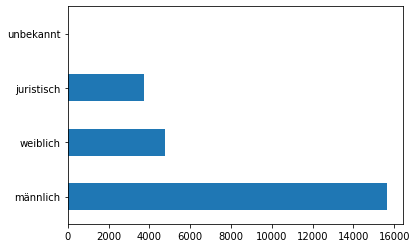

In [77]:
df_pimped.Halterart.value_counts().plot.barh()

In [78]:
df_pimped.Halterart.value_counts(normalize=True) # pimping your car is male, but also business people love to pimp tehri ride

männlich      0.647266
weiblich      0.197887
juristisch    0.154267
unbekannt     0.000580
Name: Halterart, dtype: float64

In [79]:
df_pw.Halterart.value_counts(normalize=True) 

männlich      0.544652
weiblich      0.325465
juristisch    0.129315
unbekannt     0.000568
Name: Halterart, dtype: float64

In [80]:
df_pimped.Halterart.value_counts()


männlich      15625
weiblich       4777
juristisch     3724
unbekannt        14
Name: Halterart, dtype: int64

In [81]:
df_pw.Halterart.value_counts().to_csv("pw_halter.csv")

In [82]:
# the above are all the pimped cars
#now i wanna see how many cars per code 'BFS-Gemeinde-Nr' or 'Ort'

In [83]:
df_pimped['Ort'].value_counts()

Zürich                  1099
Bern                     246
Winterthur               242
Basel                    203
St. Gallen               196
                        ... 
Gentilino                  1
Les Monts-de-Corsier       1
Hasliberg Goldern          1
Busovaca                   1
Flaach                     1
Name: Ort, Length: 3186, dtype: int64

In [84]:
df_pw['Ort'].value_counts()

Zürich                   134673
Genève                    67322
Basel                     51021
Bern                      49981
Lausanne                  46346
                          ...  
Benderi                       1
-8 Krakow                     1
Detmarovice                   1
Ungarn - Egercsehi            1
Niederwangen bei Bern         1
Name: Ort, Length: 11743, dtype: int64

In [85]:
dfnew=df_pimped['Ort'].value_counts().to_frame()

In [86]:
df_pimped['Ort'].value_counts().to_frame()

,Ort
Zürich,1099
Bern,246
Winterthur,242
Basel,203
St. Gallen,196
...,...
Gentilino,1
Les Monts-de-Corsier,1
Hasliberg Goldern,1
Busovaca,1


In [87]:
dfnew['car'] = df_pw['Ort'].value_counts()

dfnew.head()

# that i learned from TA. now i could ad a column and calculate the percentage

,Ort,car
Zürich,1099,134673
Bern,246,49981
Winterthur,242,43741
Basel,203,51021
St. Gallen,196,33696


In [88]:
# I wana see the percentage: df_pimped['Ort']: df_pw['Ort'] x 100

In [89]:
dfnew['Prozent'] = dfnew['Ort'] / dfnew['car'] * 100

In [90]:
dfnew = dfnew.rename(columns={'Ort': 'Getunte_Personenwagen'})

In [91]:
dfnew = dfnew.rename(columns={'car': 'Personenwagen'})

In [92]:
dfnew.sort_values(by='Prozent', ascending = False)

,Getunte_Personenwagen,Personenwagen,Prozent
Olomovc,1,1,100.000000
0-500 Vic,1,1,100.000000
Rappenhalden,1,1,100.000000
Verona Caldiero,1,1,100.000000
Marsa Dubai,1,1,100.000000
...,...,...,...
La Sarraz,1,1473,0.067889
Corcelles-près-Payerne,1,1560,0.064103
Vacallo,1,1590,0.062893
Vandoeuvres,1,1596,0.062657


In [93]:
df_skip = dfnew[dfnew.Prozent!=100]

In [94]:
df_clean = df_skip[df_skip.Personenwagen>2000] # i can change the number of cars

In [95]:
df_clean.sort_values(by='Prozent', ascending = False)

,Getunte_Personenwagen,Personenwagen,Prozent
Obfelden,46,3147,1.461710
Oberrieden,34,2573,1.321415
Birmensdorf ZH,46,3530,1.303116
Bonstetten,35,2792,1.253582
Langnau am Albis,47,3910,1.202046
...,...,...,...
Le Grand-Saconnex,6,5108,0.117463
Châtelaine,4,4114,0.097229
Confignon,2,2261,0.088456
St-Sulpice VD,2,2396,0.083472


In [96]:
df_clean['Prozent'].mean()

0.5254888118438732

In [100]:
df_clean.sort_values(by='Prozent', ascending = False).head(10)

,Getunte_Personenwagen,Personenwagen,Prozent
Obfelden,46,3147,1.461710
Oberrieden,34,2573,1.321415
Birmensdorf ZH,46,3530,1.303116
Bonstetten,35,2792,1.253582
Langnau am Albis,47,3910,1.202046
Au ZH,38,3176,1.196474
Mettmenstetten,35,2944,1.188859
Freienbach,28,2428,1.153213
Uitikon Waldegg,31,2706,1.145602
Emmen,47,4170,1.127098
